# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()# for theme
import warnings
warnings.filterwarnings('ignore')

# Reading the datasets

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [3]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

# Finding Amount of NaN values in Dataset

In [6]:
null_features=pd.DataFrame(train.isnull().sum(),columns=['null_counts'])
null_features['features']=null_features.index
null_features['null_percentage']=null_features['null_counts']/1460*100
null_features['Usability']=np.where(null_features['null_percentage']>20,'Discard','Keep')
null_features=null_features.sort_values(by='null_percentage',ascending=False)

null_features

,null_counts,features,null_percentage,Usability
PoolQC,1453,PoolQC,99.520548,Discard
MiscFeature,1406,MiscFeature,96.301370,Discard
Alley,1369,Alley,93.767123,Discard
Fence,1179,Fence,80.753425,Discard
FireplaceQu,690,FireplaceQu,47.260274,Discard
LotFrontage,259,LotFrontage,17.739726,Keep
GarageYrBlt,81,GarageYrBlt,5.547945,Keep
GarageCond,81,GarageCond,5.547945,Keep
GarageType,81,GarageType,5.547945,Keep
GarageFinish,81,GarageFinish,5.547945,Keep


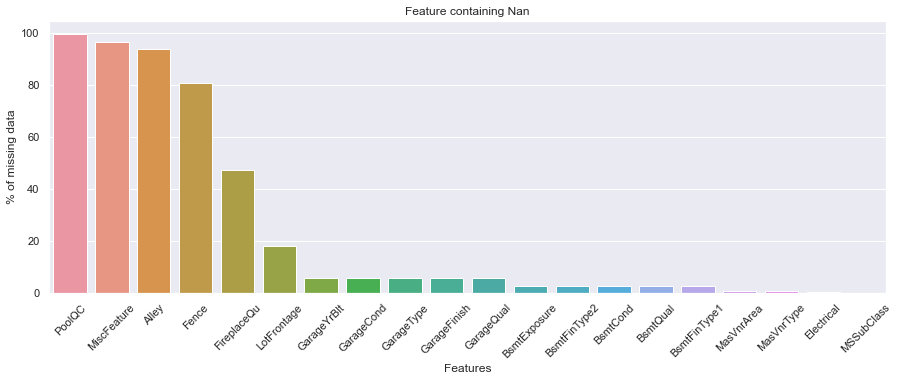

In [7]:
plt.figure(figsize=(15,5))
sns.barplot(x=null_features.features[:20],y=null_features.null_percentage[:20])
plt.xticks(rotation=45)
plt.title('Feature containing Nan')
plt.xlabel('Features')
plt.ylabel('% of missing data')
plt.show()

<AxesSubplot:>

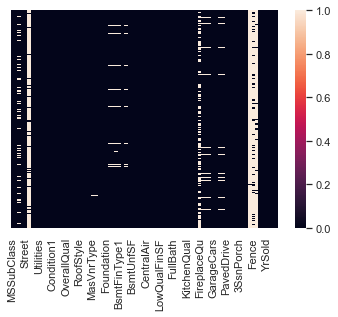

In [8]:
sns.heatmap(train.isnull(),yticklabels=False)

# Dropping Features having more than 45% of NaN values

In [9]:
for feature in train.columns:
    null_percentage=train[feature].isnull().mean()
    
    if null_percentage>0.45:
        train.drop(feature,axis=1,inplace=True)
        test.drop(feature,axis=1,inplace=True)
        null_features.drop(feature,axis=0,inplace=True)

<AxesSubplot:>

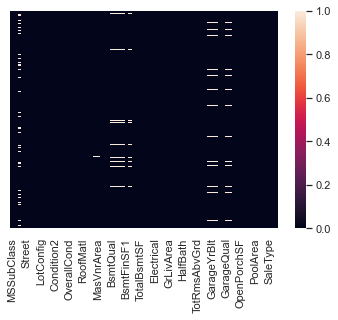

In [10]:
sns.heatmap(train.isnull(),yticklabels=False)

In [11]:
null_features

,null_counts,features,null_percentage,Usability
LotFrontage,259,LotFrontage,17.739726,Keep
GarageYrBlt,81,GarageYrBlt,5.547945,Keep
GarageCond,81,GarageCond,5.547945,Keep
GarageType,81,GarageType,5.547945,Keep
GarageFinish,81,GarageFinish,5.547945,Keep
GarageQual,81,GarageQual,5.547945,Keep
BsmtExposure,38,BsmtExposure,2.602740,Keep
BsmtFinType2,38,BsmtFinType2,2.602740,Keep
BsmtCond,37,BsmtCond,2.534247,Keep
BsmtQual,37,BsmtQual,2.534247,Keep


# Extracting Numerical Features

In [12]:
numerical_features = train.select_dtypes(exclude='object').copy()
numerical_features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


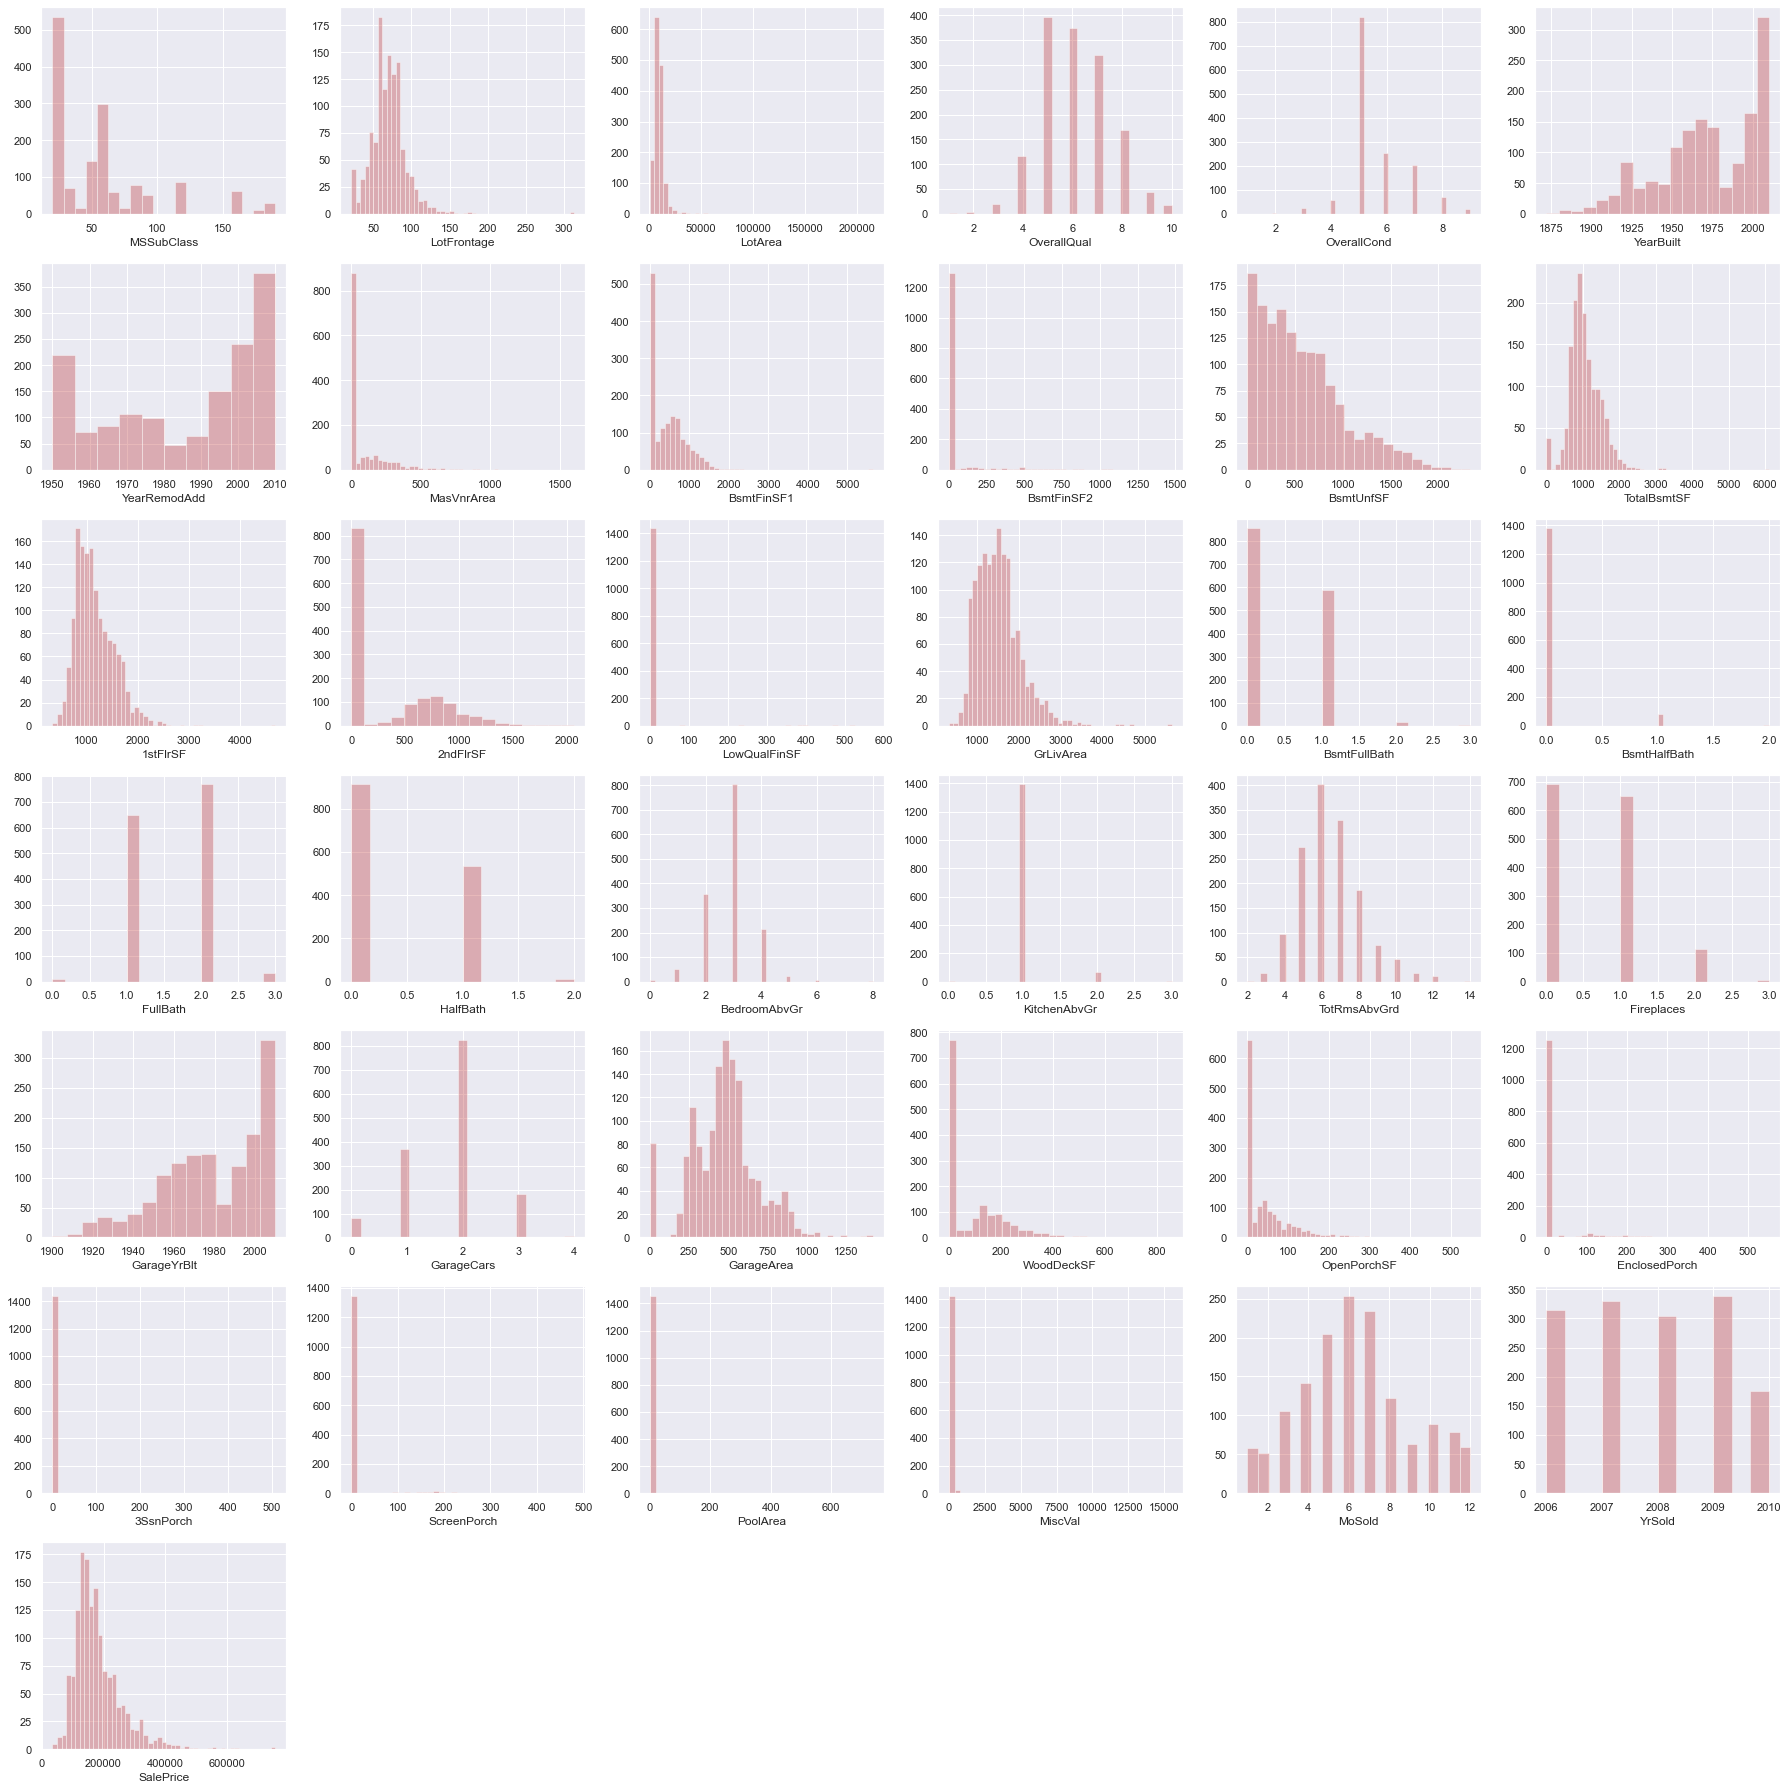

In [13]:
fig = plt.figure(figsize=(25,25))

for index,col in enumerate(numerical_features):
    plt.subplot(7,6,index+1)
    sns.distplot(numerical_features[col].dropna(),kde=False,color='r')
    
fig.tight_layout(pad=1.0)    

# Finding Discrete features/ordinal features

In [14]:
discrete_numerical_feature=['MSSubClass','MoSold','GarageCars','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','BedroomAbvGr',
 'TotRmsAbvGrd','Fireplaces','OverallQual','OverallCond','KitchenAbvGr']

# Dropping Unsignificant features from the numerical features

In [15]:
# we can drop certain numerical vairables have only one kind of value
train.drop(['MasVnrArea','BsmtFinSF1','2ndFlrSF','WoodDeckSF','OpenPorchSF',
            'BsmtFinSF2','LowQualFinSF','BsmtHalfBath',
            'KitchenAbvGr','EnclosedPorch','3SsnPorch',
            'ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

test.drop(['MasVnrArea','BsmtFinSF1','2ndFlrSF','WoodDeckSF','OpenPorchSF',
           'BsmtFinSF2','LowQualFinSF','BsmtHalfBath',
            'KitchenAbvGr','EnclosedPorch','3SsnPorch',
            'ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

numerical_features.drop(set(discrete_numerical_feature+['MasVnrArea','BsmtFinSF1','2ndFlrSF','WoodDeckSF','OpenPorchSF',
           'BsmtFinSF2','LowQualFinSF','BsmtHalfBath',
            'KitchenAbvGr','EnclosedPorch','3SsnPorch',
            'ScreenPorch','PoolArea','MiscVal']),axis=1,inplace=True)


# numerical_features.drop(,axis=1,inplace=True)

# Extracting categorical features

In [16]:
categorical_features = train.select_dtypes(include='object' or discrete_numerical_feature).copy()

for feature in train.columns:
    if feature in discrete_numerical_feature or train[feature].dtype=='O':
        categorical_features[feature]=train[feature].copy()
    
    
categorical_features.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,60,7,5,1,2,1,3,8,0,2,2
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,20,6,8,0,2,0,3,6,1,2,5
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,60,7,5,1,2,1,3,6,1,2,9
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,70,7,5,1,1,0,3,7,1,3,2
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,60,8,5,1,2,1,4,9,1,3,12


# Detecting Outliers

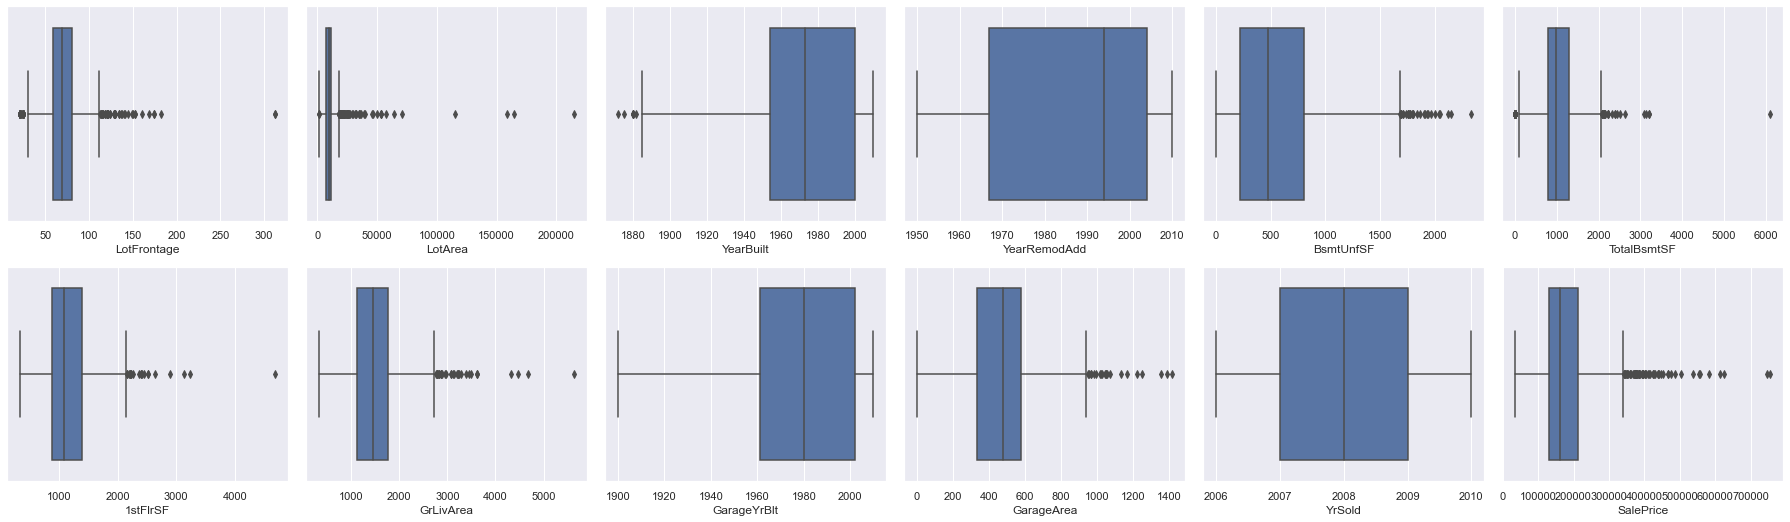

In [17]:
fig = plt.figure(figsize=(25,25))

for index,col in enumerate(numerical_features):
    plt.subplot(7,6,index+1)
    sns.boxplot(numerical_features[col].dropna())
    
fig.tight_layout(pad=1.0)  

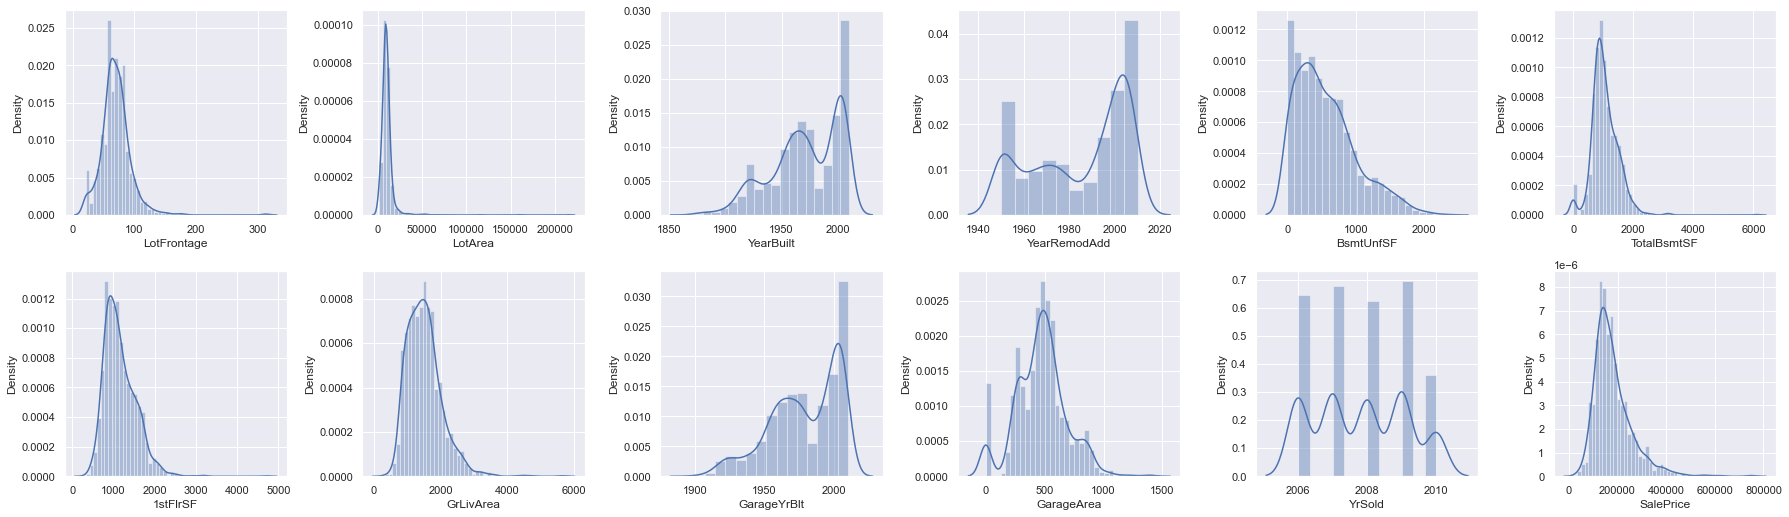

In [18]:
fig = plt.figure(figsize=(25,25))

for index,col in enumerate(numerical_features):
    plt.subplot(7,6,index+1)
    sns.distplot(numerical_features[col].dropna())
    
fig.tight_layout(pad=1.0) 

In [22]:
numerical_features.isnull().sum()

LotFrontage     259
LotArea           0
YearBuilt         0
YearRemodAdd      0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
GarageYrBlt      81
GarageArea        0
YrSold            0
SalePrice         0
dtype: int64

<AxesSubplot:>

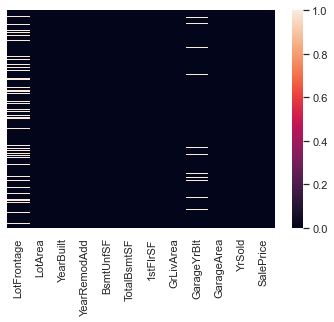

In [23]:
sns.heatmap(numerical_features.isnull(),yticklabels=False)

In [24]:
Year_feature=[]

for feature in numerical_features.columns:
    if "Yr" in feature or "Year" in feature:
        Year_feature.append(feature)
        
Year_feature        

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [25]:
numerical_null_features=[]
for feature in numerical_features.columns:
    if feature not in Year_feature and numerical_features[feature].isnull().sum()>0 and numerical_features[feature].dtype!="O":
        numerical_null_features.append(feature) 
    
numerical_null_features    

['LotFrontage']

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

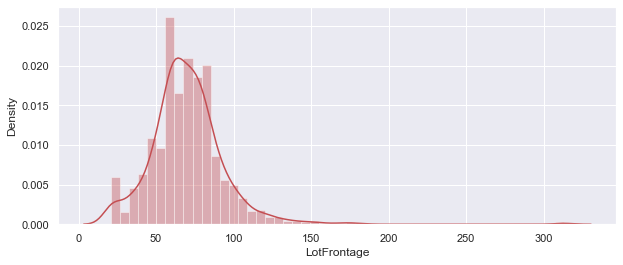

In [26]:
fig = plt.figure(figsize=(10,4))
sns.distplot(numerical_features['LotFrontage'],kde=True,color='r')  

In [27]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].median())
numerical_features['LotFrontage']=numerical_features['LotFrontage'].fillna(numerical_features['LotFrontage'].median())

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

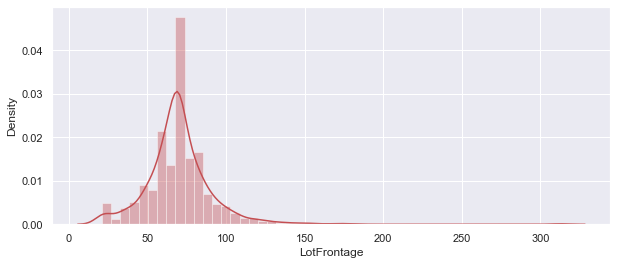

In [28]:
fig = plt.figure(figsize=(10,4))
sns.distplot(numerical_features['LotFrontage'],kde=True,color='r')

<AxesSubplot:>

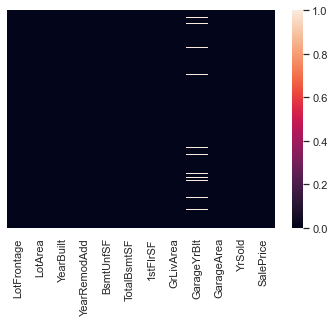

In [29]:
sns.heatmap(numerical_features.isnull(),yticklabels=False)

# Solution for NaN  in `GarageYrBlt` 

<AxesSubplot:xlabel='YearBuilt', ylabel='GarageYrBlt'>

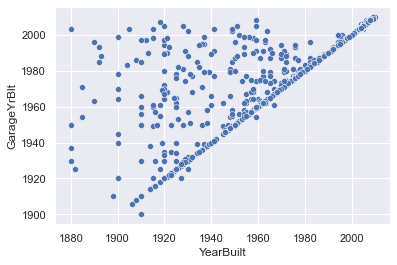

In [30]:
# for series having "Year" type data
sns.scatterplot(numerical_features['YearBuilt'],numerical_features['GarageYrBlt'])

In [31]:
print("Numerical_feature shape -> ",numerical_features.shape)
print(len(numerical_features[(numerical_features['GarageYrBlt']-numerical_features['YearBuilt'])==0]))
print("Train shape -> ",train.shape)
print(len(train[(train['GarageYrBlt']-train['YearBuilt'])==0]))
print("Test shape -> ",test.shape)
print(len(test[test['GarageYrBlt']-test['YearBuilt']==0]))
# Here the most of the GarageYrBlt and YearBuilt are same.

Numerical_feature shape ->  (1460, 12)
1089
Train shape ->  (1460, 61)
1089
Test shape ->  (1459, 60)
1127


In [32]:
numerical_features['GarageYrBlt']=numerical_features['GarageYrBlt'].fillna(numerical_features['YearBuilt'])
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['YearBuilt'])
test['GarageYrBlt']=train['GarageYrBlt'].fillna(train['YearBuilt'])

<AxesSubplot:>

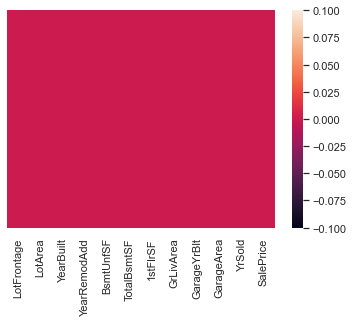

In [33]:
sns.heatmap(numerical_features.isnull(),yticklabels=False)

# Doing feature engineering for Feature containing Years

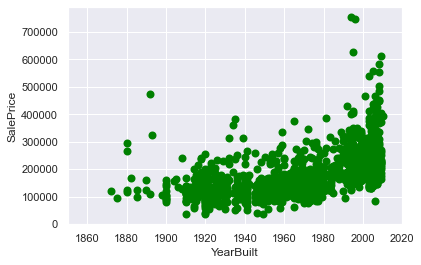

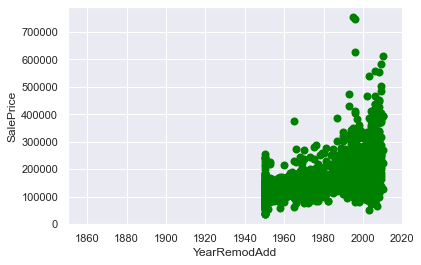

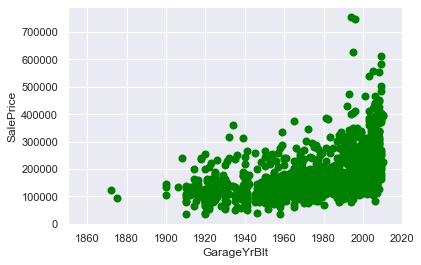

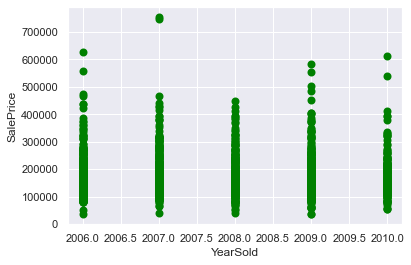

In [34]:
for f in Year_feature:
    if f!='YrSold':
        plt.scatter(numerical_features[f],numerical_features["SalePrice"],c ="green",linewidths = 2)
        plt.xlabel(f)
        plt.ylabel("SalePrice")
        plt.xlim(1850,2020)
        plt.show()
    
plt.scatter(numerical_features['YrSold'],numerical_features["SalePrice"],c ="green",linewidths = 2)
plt.xlabel('YearSold')
plt.ylabel("SalePrice")
plt.show()
 

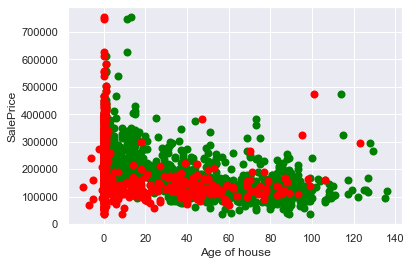

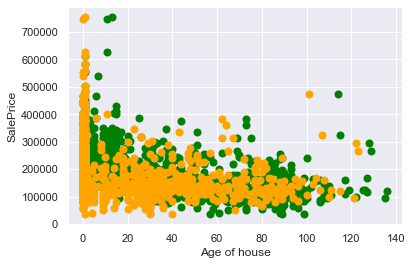

In [35]:
plt.scatter(numerical_features['YrSold']- numerical_features['YearBuilt'],numerical_features["SalePrice"],c ="green",linewidths = 2)
plt.scatter(numerical_features['GarageYrBlt']- numerical_features['YearBuilt'],numerical_features["SalePrice"],c ="red",linewidths = 2)
plt.xlabel("Age of house")
plt.ylabel("SalePrice")
plt.show()

plt.scatter(numerical_features['YrSold']- numerical_features['YearBuilt'],numerical_features["SalePrice"],c ="green",linewidths = 2)
plt.scatter(numerical_features['YearRemodAdd']- numerical_features['YearBuilt'],numerical_features["SalePrice"],c ="orange",linewidths = 2)
plt.xlabel("Age of house")
plt.ylabel("SalePrice")
plt.show()



## from above analysis we have the deduction that we can replca all features with Years with the age of the house

In [36]:
numerical_features["age of House"]=numerical_features['YrSold']- numerical_features['YearBuilt']
numerical_features.drop(Year_feature,axis=1,inplace=True)

train["age of House"]=train['YrSold']- train['YearBuilt']
train.drop(Year_feature,axis=1,inplace=True)

test["age of House"]=test['YrSold']- test['YearBuilt']
test.drop(Year_feature,axis=1,inplace=True)

# train.head()
numerical_features.head()

,LotFrontage,LotArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,SalePrice,age of House
0,65.0,8450,150,856,856,1710,548,208500,5
1,80.0,9600,284,1262,1262,1262,460,181500,31
2,68.0,11250,434,920,920,1786,608,223500,7
3,60.0,9550,540,756,961,1717,642,140000,91
4,84.0,14260,490,1145,1145,2198,836,250000,8


<AxesSubplot:>

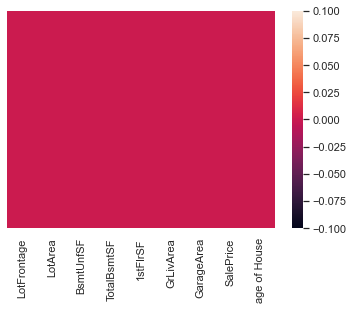

In [37]:
sns.heatmap(numerical_features.isnull(),yticklabels=False)

# Feature engineering on Categorical features

In [38]:
categorical_features.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,60,7,5,1,2,1,3,8,0,2,2
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,20,6,8,0,2,0,3,6,1,2,5
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,60,7,5,1,2,1,3,6,1,2,9
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,70,7,5,1,1,0,3,7,1,3,2
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,60,8,5,1,2,1,4,9,1,3,12


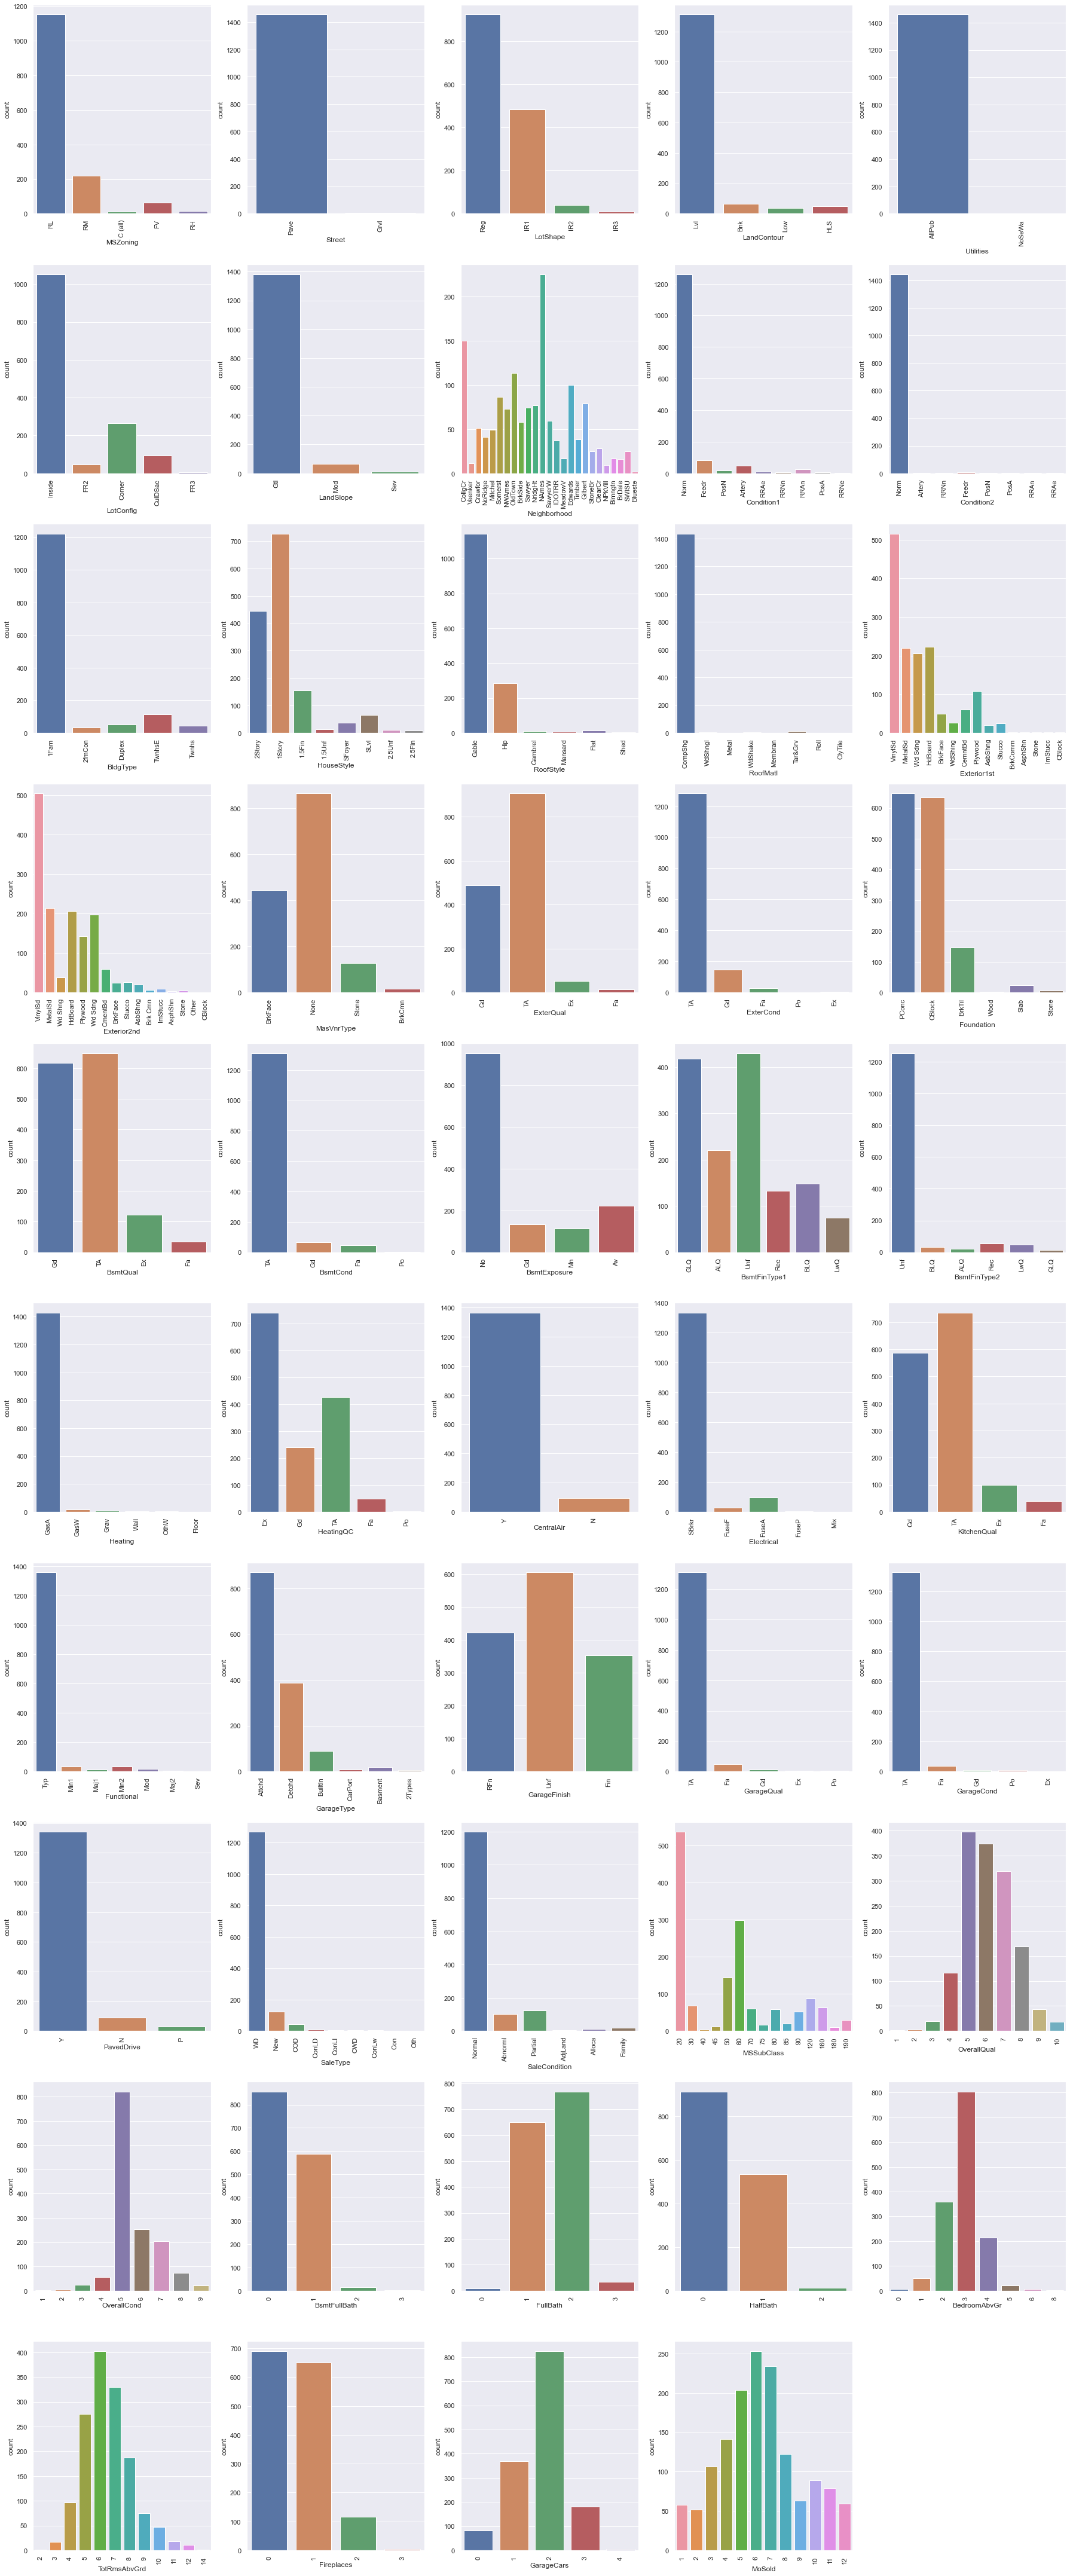

In [39]:
fig=plt.figure(figsize=(25,60))

for index in range(len(categorical_features.columns)):
    plt.subplot(10,5,index+1)
    sns.countplot(x=categorical_features.iloc[:,index],data=categorical_features.dropna())
    plt.xticks(rotation=90)
        
fig.tight_layout(pad=1.0)    

# Dropping Unsiginificant Categorical features

In [40]:
# From the given plot we can tell that certain categorical features have one value only

categorical_features.drop(['Street','LandContour','LandSlope',
           'Condition1','Condition2','BldgType',
           'RoofMatl','ExterCond','BsmtCond',
           'BsmtFinType2','Heating','CentralAir',
            'Electrical','Functional','GarageQual',
           'GarageCond','PavedDrive','SaleType',
            'SaleCondition'],axis=1,inplace=True)


train.drop(['Street','LandContour','LandSlope',
           'Condition1','Condition2','BldgType',
           'RoofMatl','ExterCond','BsmtCond',
           'BsmtFinType2','Heating','CentralAir',
            'Electrical','Functional','GarageQual',
           'GarageCond','PavedDrive','SaleType',
            'SaleCondition'],axis=1,inplace=True)

test.drop(['Street','LandContour','LandSlope',
           'Condition1','Condition2','BldgType',
           'RoofMatl','ExterCond','BsmtCond',
           'BsmtFinType2','Heating','CentralAir',
            'Electrical','Functional','GarageQual',
           'GarageCond','PavedDrive','SaleType',
            'SaleCondition'],axis=1,inplace=True)

In [41]:
categorical_features.isnull().sum()

MSZoning         0
LotShape         0
Utilities        0
LotConfig        0
Neighborhood     0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
ExterQual        0
Foundation       0
BsmtQual        37
BsmtExposure    38
BsmtFinType1    37
HeatingQC        0
KitchenQual      0
GarageType      81
GarageFinish    81
MSSubClass       0
OverallQual      0
OverallCond      0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
MoSold           0
dtype: int64

<AxesSubplot:>

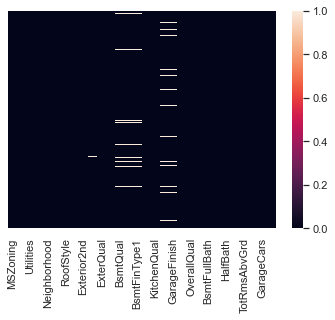

In [42]:
sns.heatmap(categorical_features.isnull(),yticklabels=False)

# Replcing NaN values in categorical feature with their respective modes

In [43]:
for feature in train.columns:
    if train[feature].isnull().sum()>0 and train[feature].dtype=="O":
        categorical_features[feature]=categorical_features[feature].fillna(categorical_features[feature].mode()[0])
        train[feature]=train[feature].fillna(train[feature].mode()[0])
        test[feature]=test[feature].fillna(test[feature].mode()[0])    

<AxesSubplot:>

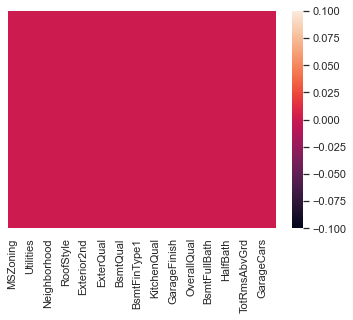

In [44]:
sns.heatmap(categorical_features.isnull(),yticklabels=False)

# Checking whether test data contains NaN or not

In [45]:
test.isnull().sum()

MSSubClass        0
MSZoning          4
LotFrontage     227
LotArea           0
LotShape          0
Utilities         2
LotConfig         0
Neighborhood      0
HouseStyle        0
OverallQual       0
OverallCond       0
RoofStyle         0
Exterior1st       1
Exterior2nd       1
MasVnrType        0
ExterQual         0
Foundation        0
BsmtQual          0
BsmtExposure      0
BsmtFinType1      0
BsmtUnfSF         1
TotalBsmtSF       1
HeatingQC         0
1stFlrSF          0
GrLivArea         0
BsmtFullBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenQual       1
TotRmsAbvGrd      0
Fireplaces        0
GarageType        0
GarageFinish      0
GarageCars        1
GarageArea        1
MoSold            0
age of House      0
dtype: int64

<AxesSubplot:>

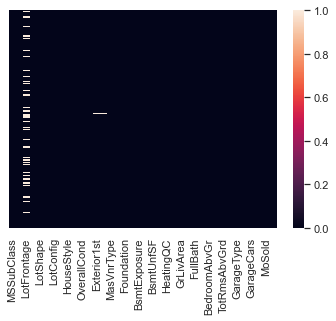

In [46]:
sns.heatmap(test.isnull(),yticklabels=False)

# Solving for NaN in test data

In [47]:
for f in numerical_features.columns:
    if f!='SalePrice':
        test[f]=test[f].fillna(test[f].mean())
    
for f in categorical_features.columns:
    test[f]=test[f].fillna(test[f].mode()[0])

In [48]:
test.isnull().sum()

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
LotShape        0
Utilities       0
LotConfig       0
Neighborhood    0
HouseStyle      0
OverallQual     0
OverallCond     0
RoofStyle       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtUnfSF       0
TotalBsmtSF     0
HeatingQC       0
1stFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
GarageType      0
GarageFinish    0
GarageCars      0
GarageArea      0
MoSold          0
age of House    0
dtype: int64

<AxesSubplot:>

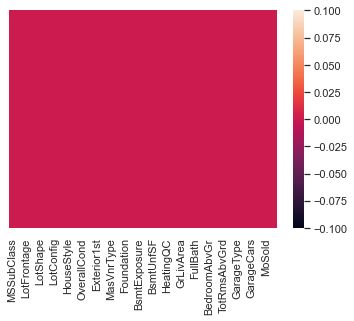

In [49]:
sns.heatmap(test.isnull(),yticklabels=False)

# Standardization of features

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

feature_standard=numerical_features.drop('SalePrice',axis=1).columns

numerical_features[feature_standard]=scaler.fit_transform(numerical_features[feature_standard])
train[feature_standard] = scaler.fit_transform(train[feature_standard])
test[feature_standard] = scaler.transform(test[feature_standard])

In [51]:
numerical_features.head()

,LotFrontage,LotArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,SalePrice,age of House
0,-0.220875,-0.207142,-0.944591,-0.459303,-0.793434,0.370333,0.351000,208500,-1.043259
1,0.460320,-0.091886,-0.641228,0.466465,0.257140,-0.482512,-0.060731,181500,-0.183465
2,-0.084636,0.073480,-0.301643,-0.313369,-0.627826,0.515013,0.631726,223500,-0.977121
3,-0.447940,-0.096897,-0.061670,-0.687324,-0.521734,0.383659,0.790804,140000,1.800676
4,0.641972,0.375148,-0.174865,0.199680,-0.045611,1.299326,1.698485,250000,-0.944052


# Checking for multi-colinearity

<AxesSubplot:>

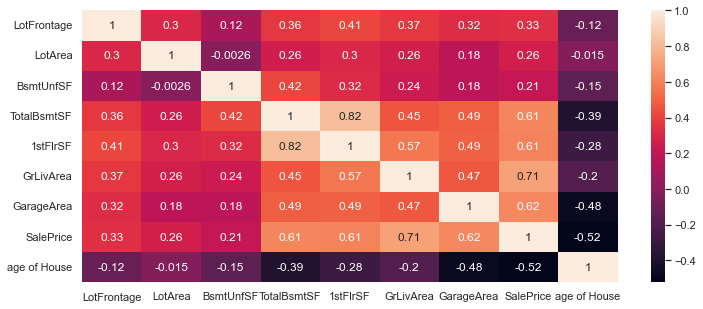

In [52]:
plt.figure(figsize=(12,5))
sns.heatmap(numerical_features.corr(),annot=True)            

In [53]:
numerical_features.drop('TotalBsmtSF',axis=1,inplace=True)
train.drop('TotalBsmtSF',axis=1,inplace=True)
test.drop('TotalBsmtSF',axis=1,inplace=True)

In [54]:
numerical_features.head()

,LotFrontage,LotArea,BsmtUnfSF,1stFlrSF,GrLivArea,GarageArea,SalePrice,age of House
0,-0.220875,-0.207142,-0.944591,-0.793434,0.370333,0.351000,208500,-1.043259
1,0.460320,-0.091886,-0.641228,0.257140,-0.482512,-0.060731,181500,-0.183465
2,-0.084636,0.073480,-0.301643,-0.627826,0.515013,0.631726,223500,-0.977121
3,-0.447940,-0.096897,-0.061670,-0.521734,0.383659,0.790804,140000,1.800676
4,0.641972,0.375148,-0.174865,-0.045611,1.299326,1.698485,250000,-0.944052


In [55]:
print(train.shape)
print(test.shape)

(1460, 38)
(1459, 37)


## There can be the case for categorical features that, a train feature can have 3 unique classes whereas same feature test can have 5 unique classes this leads to differece in no. of feature in test and train data while creating dummy variables.

## So, In order to solve this problem we can concatenate train and test data and than apply dummy variable feature.

In [56]:
print(train.shape)
print(test.shape)

(1460, 38)
(1459, 37)


In [57]:
data = train.append(test)

In [58]:
data.shape

(2919, 38)

In [59]:
categorical_columns=categorical_features.columns

for feature in categorical_columns:
    data = pd.get_dummies(data, columns = [feature],drop_first=True)
    categorical_features = pd.get_dummies(categorical_features, columns = [feature],drop_first=True)

In [60]:
categorical_features.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,

In [61]:
data.head()

,LotFrontage,LotArea,BsmtUnfSF,1stFlrSF,GrLivArea,GarageArea,SalePrice,age of House,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_13,TotRmsAbvGrd_14,TotRmsAbvGrd_15,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
0,-0.220875,-0.207142,-0.944591,-0.793434,0.370333,0.351000,208500.0,-1.043259,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.460320,-0.091886,-0.641228,0.257140,-0.482512,-0.060731,181500.0,-0.183465,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [62]:
data.shape

(2919, 202)

In [63]:
train = data[:1460]
test = data[1460:]

# test.columns
test.drop("SalePrice",axis=1,inplace=True)

In [64]:
print(train.shape)
print(test.shape)

(1460, 202)
(1459, 201)


# Doing Hyperparameter tuning for XG boost regressor

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
import xgboost as xg
xg_regressor=xg.XGBRegressor()

In [67]:
xg_boost_prams = {
    'n_estimators':[1000,10000,100000,200000,300000],
    'base_score':[0.25,0.5,0.75,1],
    'booster':['gbtree'],
    'learning_rate':[0.001],
    'max_depth':[1,2,3,4,5],
    'min_child_weight':[1,2,3,4]
}


In [1]:
xg_random_cv = RandomizedSearchCV(estimator=xg_regressor,
                                  param_distributions=xg_boost_prams,
                                  n_iter=50,
                                  cv=5,
                                  verbose=5,
                                  random_state=100,
                                  n_jobs=2,
                                  return_train_score=True,
                                  scoring='neg_mean_absolute_error')

In [ ]:
xg_random_cv.fit(train.drop("SalePrice",axis=1),train["SalePrice"])

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [200]:
xg_random_cv.best_params_

{'n_estimators': 700,
 'min_child_weight': 2,
 'max_depth': 2,
 'learning_rate': 0.001,
 'booster': 'gbtree',
 'base_score': 0.5}

In [73]:
xg_regressor=xg.XGBRegressor(n_estimators= 200000,
 min_child_weight= 2,
 max_depth= 2,
 learning_rate= 0.001,
 booster= 'gbtree',
 base_score=0.5)
xg_regressor.fit(train.drop("SalePrice",axis=1),train["SalePrice"])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=210000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [74]:
test_xg_predict=xg_regressor.predict(test)
test_xg_predict

array([126478.516, 154651.1  , 197356.53 , ..., 140793.47 , 113223.516,
       208820.53 ], dtype=float32)

In [75]:
# from sklearn.metrics import mean_absolute_percentage_error
# print(mean_absolute_percentage_error(sub['SalePrice'],xg_pred)*100,"% error")

In [76]:
test_prediction = pd.DataFrame(test_xg_predict)

In [77]:
submission=pd.read_csv("sample_submission.csv")
datasets = pd.concat([submission['Id'],test_prediction],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)